# Perceptron



In [1]:
import numpy as np
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Perceptron Network

In [2]:
# Here I am building a normal forward propogation for a perceptron layer
# and the various function i would use.

In [3]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])



In [4]:
from MultiLayerPerceptron import MultiLayerPerceptron

In [5]:
def accuracy(model , X , Y):
    pred,_ = model.forward(X)
    pred =pred > 0.5
    acc = np.sum(pred == Y)
    acc = float(acc) / Y.shape[0]
    return acc

In [6]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])
# print(model.layers[1].W)
# print(model.layers[1].b)

(2, 1) (1,)
<function sigmoid at 0x7f808e44a620>


In [7]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [8]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.08167116]
And the error to be back propogated is:
 [[-0.125     ]
 [ 0.07952578]
 [ 0.1167338 ]
 [ 0.07252206]]


In [9]:
from Loss import binary_cross_entropy,mean_binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [2.04775087]
And the error to be back propogated is:
 [[-2.        ]
 [ 1.46649736]
 [ 1.87594449]
 [ 1.40862579]]


In [11]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3, 1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)


_=model.train(X_train,
            Y_train,
            X_train,
            Y_train,
            accuracy_fn = accuracy,
            loss_function_string='mean_binary_cross_entropy',
            epochs=20,
            record_at=1)

(2, 3) (3,)
<function sigmoid at 0x7f808e44a620>
(3, 1) (1,)
<function sigmoid at 0x7f808e44a620>
0th EPOCH:
Training Loss:[0.9421586]|Training Accuracy:0.25|Test Loss:[0.89653652]|Test Accuracy:0.25
1th EPOCH:
Training Loss:[0.89653652]|Training Accuracy:0.25|Test Loss:[0.85515473]|Test Accuracy:0.25
2th EPOCH:
Training Loss:[0.85515473]|Training Accuracy:0.25|Test Loss:[0.81767308]|Test Accuracy:0.25
3th EPOCH:
Training Loss:[0.81767308]|Training Accuracy:0.25|Test Loss:[0.78376016]|Test Accuracy:0.25
4th EPOCH:
Training Loss:[0.78376016]|Training Accuracy:0.25|Test Loss:[0.75309796]|Test Accuracy:0.25
5th EPOCH:
Training Loss:[0.75309796]|Training Accuracy:0.25|Test Loss:[0.72538544]|Test Accuracy:0.25
6th EPOCH:
Training Loss:[0.72538544]|Training Accuracy:0.25|Test Loss:[0.70034075]|Test Accuracy:0.25
7th EPOCH:
Training Loss:[0.70034075]|Training Accuracy:0.75|Test Loss:[0.67770258]|Test Accuracy:0.75
8th EPOCH:
Training Loss:[0.67770258]|Training Accuracy:1.0|Test Loss:[0.657230

In [12]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
accuracy(model , X_train,Y_train)

0.75

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.BUt we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [21]:

n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp
        
        

In [22]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [23]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

(103, 1)

In [24]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7f808e44a840>
(20, 20) (20,)
<function sigmoid at 0x7f808e44a620>
(20, 15) (15,)
<function sigmoid at 0x7f808e44a620>
(15, 8) (8,)
<function sigmoid at 0x7f808e44a620>
(8, 4) (4,)
<function tanh at 0x7f808e44a730>
(4, 1) (1,)
<function sigmoid at 0x7f808e44a620>


In [25]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','tanh','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7f808e44a840>
(20, 20) (20,)
<function sigmoid at 0x7f808e44a620>
(20, 15) (15,)
<function sigmoid at 0x7f808e44a620>
(15, 8) (8,)
<function sigmoid at 0x7f808e44a620>
(8, 4) (4,)
<function tanh at 0x7f808e44a730>
(4, 1) (1,)
<function sigmoid at 0x7f808e44a620>


In [30]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                accuracy_fn=accuracy,
                                                                                loss_function_string='mean_binary_cross_entropy',
                                                                                epochs = 500,
                                                                                record_at = 20,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:[0.7066396]|Training Accuracy:0.500542888165038|Test Loss:[0.70335916]|Test Accuracy:0.49514563106796117
20th EPOCH:
Training Loss:[0.69317848]|Training Accuracy:0.49728555917481|Test Loss:[0.69307593]|Test Accuracy:0.5048543689320388
40th EPOCH:
Training Loss:[0.69317316]|Training Accuracy:0.49728555917481|Test Loss:[0.69305239]|Test Accuracy:0.5533980582524272
60th EPOCH:
Training Loss:[0.69317253]|Training Accuracy:0.49728555917481|Test Loss:[0.69305336]|Test Accuracy:0.5631067961165048
80th EPOCH:
Training Loss:[0.69317192]|Training Accuracy:0.49728555917481|Test Loss:[0.6930547]|Test Accuracy:0.5631067961165048
100th EPOCH:
Training Loss:[0.69317132]|Training Accuracy:0.495114006514658|Test Loss:[0.69305604]|Test Accuracy:0.5631067961165048
120th EPOCH:
Training Loss:[0.69317074]|Training Accuracy:0.496199782844734|Test Loss:[0.69305737]|Test Accuracy:0.5631067961165048
140th EPOCH:
Training Loss:[0.69317016]|Training Accuracy:0.496199782844734|Test Loss:[

In [31]:
import matplotlib.pyplot as plt


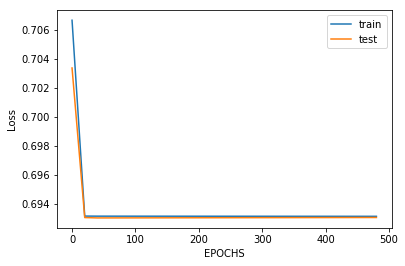

In [32]:
train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend([train_line, test_line] , ['train','test'])
plt.show()

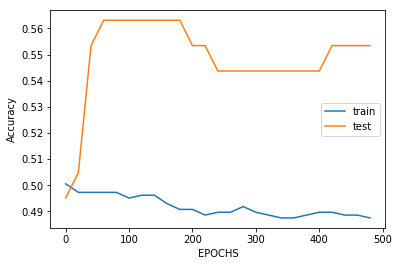

In [33]:
train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend([train_line, test_line] , ['train','test'])
plt.show()
plt.show()